In [1]:
import torch
from boardGPT.utils import load_safetensors
from IPython.display import HTML

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = load_safetensors("../out/safetensors/model.safetensors", "../out/safetensors/config.json")
model = model.to(device)
model.set_flash(False)

/home/schaetti/miniconda3/envs/BoardGPT/lib/python3.11/site-packages/torch/cuda/__init__.py:182: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:107.)
  return torch._C._cuda_getDeviceCount() > 0


Loading weights from safetensors file: ../out/safetensors/model.safetensors
Successfully loaded weights from ../out/safetensors/model.safetensors


In [3]:
tok_emb = None

def token_emb_fn(x):
    global tok_emb
    tok_emb = x
    return x
# end token_emb_fn

# Add hooks
model.token_emb_hook.add_hook(token_emb_fn)
model.transformer['h'][-1]

In [4]:
moves = model.generate_moves(
    sequence=['c4', 'c3'],
    max_new_tokens=1,
    device=device
)

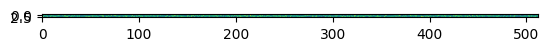

In [8]:
import matplotlib.pyplot as plt
plt.imshow(tok_emb[0].cpu().detach().numpy())